# NIFTY 50 through years 2007-2021
the dataset shows the performance of NIFTY 50 from September 2007 to April 2021. I got it from Kaggle. I am going to analyse the dataset and make inferences about it. I going to use Numpy, Pandas, Matplotlib,and Seaborn to do this.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset
I am going to download the Dataset from Kaggle

In [65]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [197]:
dataset_url = 'https://www.kaggle.com/datasets/oneplustricks/nifty-50-20072021' 

In [198]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\nifty-50-20072021" (use force=True to force download)


The dataset has been downloaded and extracted.

In [199]:
data_dir = r'.\nifty-50-20072021'

In [200]:
import os
os.listdir(data_dir)

['NSEI .csv']

Let us save and upload our work to Jovian before continuing.

In [201]:
project_name = "nifty50-through-years-2007-2021"

In [202]:
!pip install jovian --upgrade -q

In [203]:
import jovian

In [204]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "jiyakirori/nifty50-through-years-2007-2021"
[jovian] Committed successfully! https://jovian.ai/jiyakirori/nifty50-through-years-2007-2021


'https://jovian.ai/jiyakirori/nifty50-through-years-2007-2021'

## Data Preparation and Cleaning
I will load and check if it fufills the minimum requirement of 3 columns and 150 rows. i will fix the missing data by replacing it with the previous date's data

In [205]:
import pandas as pd
import numpy as np

In [206]:
stock_df = pd.read_csv(r'nifty-50-20072021\NSEI .csv')
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0
...,...,...,...,...,...,...,...
3348,2021-04-12,14644.650391,14652.500000,14248.700195,14310.799805,14310.799805,650200.0
3349,2021-04-13,14364.900391,14528.900391,14274.900391,14504.799805,14504.799805,605100.0
3350,2021-04-15,14522.400391,14597.549805,14353.200195,14581.450195,14581.450195,568000.0
3351,2021-04-16,14599.599609,14697.700195,14559.000000,14617.849609,14617.849609,577200.0


In [207]:
stock_df.shape

(3353, 7)

In [208]:
stock_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3.318000e+03
mean,7605.107718,7651.544607,7545.445626,7599.239017,7599.239017,1.804448e+05
std,2771.825727,2773.572240,2760.632696,2767.140530,2767.140530,2.231816e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00
25%,5321.312378,5367.099976,5275.387451,5321.062622,5321.062622,0.000000e+00
50%,7412.400147,7469.875000,7361.850098,7409.925049,7409.925049,1.438500e+05
75%,9971.012451,10023.400146,9912.437256,9971.275391,9971.275391,2.335750e+05
max,15371.450195,15431.750000,15243.400391,15314.700195,15314.700195,1.811000e+06


In [209]:
stock_df.isna().sum()

Date          0
Open         35
High         35
Low          35
Close        35
Adj Close    35
Volume       35
dtype: int64

In [210]:
stock_df=stock_df.fillna(method='bfill')

In [211]:
stock_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [212]:
import jovian

In [213]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jiyakirori/nifty50-through-years-2007-2021" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/jiyakirori/nifty50-through-years-2007-2021


'https://jovian.ai/jiyakirori/nifty50-through-years-2007-2021'

## Exploratory Analysis and Visualization
I am going to explore the various relationships in the dataset and make some inferences about the data

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [214]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [215]:
stock_df['Date'] = pd.to_datetime(stock_df.Date)
stock_df['year'] = pd.DatetimeIndex(stock_df.Date).year

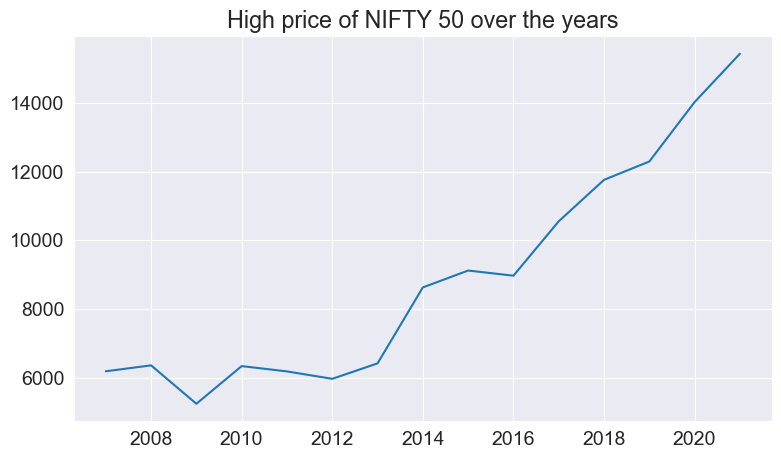

In [133]:
plt.title("High price of NIFTY 50 over the years")
High_prices_per_year=stock_df.groupby('year').max()['High']
High_prices_per_year=High_prices_per_year.reset_index()
High_prices_per_year
plt.plot(High_prices_per_year['year'], High_prices_per_year['High'])

So, I first explored the high price of each year. To do this I had to add a new column Years and aggregate my data to make the graph. as per the graph the high price has overally grown year on year. there was a giant leap in the years 2016 to 2018.

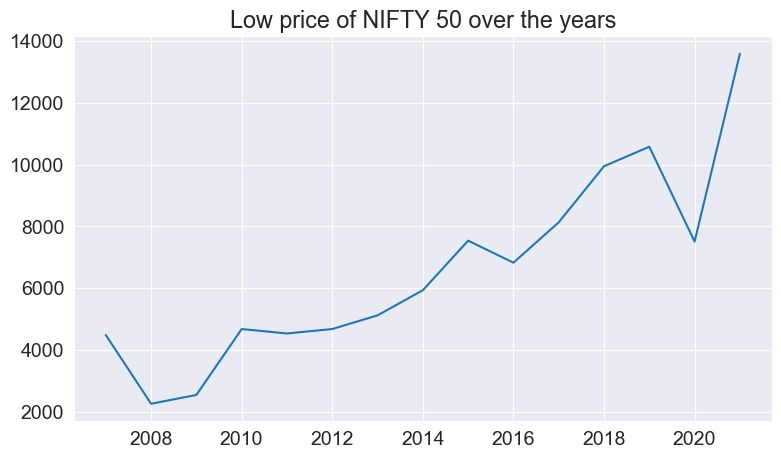

In [136]:
plt.title("Low price of NIFTY 50 over the years")
low_prices_per_year=stock_df.groupby('year').min()['Low']
low_prices_per_year=low_prices_per_year.reset_index()
High_prices_per_year
plt.plot(low_prices_per_year['year'], low_prices_per_year['Low'])

So, I explored the low price of each year.I used the minimum method to find the lowest pre per year. as per the graph the low price has overally increased year on year. there was a big fall in 2008 and 2020. the 2008 fall would be because of the market collapse in 2008 and COVID-19 in 2020

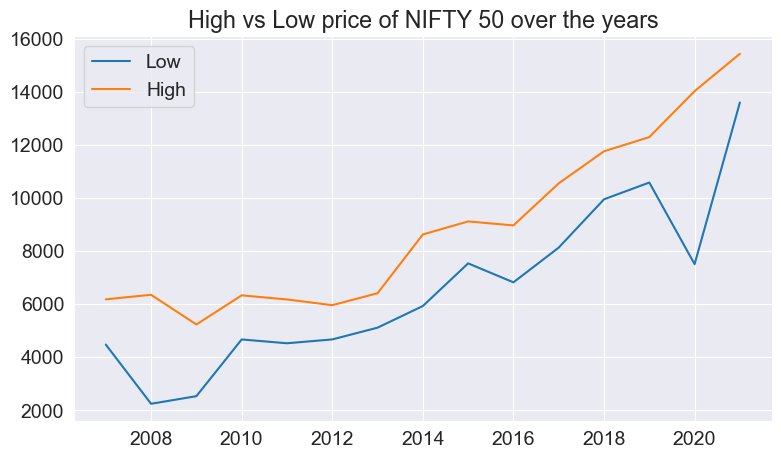

In [216]:
plt.title("High vs Low price of NIFTY 50 over the years")
plt.plot(low_prices_per_year['year'], low_prices_per_year['Low'])
plt.plot(High_prices_per_year['year'], High_prices_per_year['High'])
plt.legend(["Low", "High"])

So, I plotted both the low price and high price of each year.we can see that there is a gap between the low price and high price of each year and the market flucturated between these prices in a specific year.

C:\Users\BESTSELLER\AppData\Local\Temp\ipykernel_22740\1267292638.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vol_prices_per_year=stock_df.groupby('year').mean()['Volume']


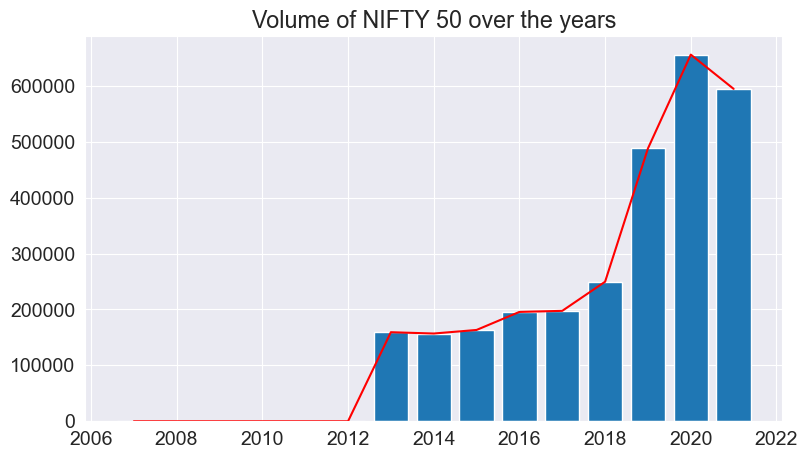

In [217]:
plt.title("Volume of NIFTY 50 over the years")
vol_prices_per_year=stock_df.groupby('year').mean()['Volume']
vol_prices_per_year=vol_prices_per_year.reset_index()
plt.bar(vol_prices_per_year['year'], vol_prices_per_year['Volume'])
plt.plot(vol_prices_per_year['year'], vol_prices_per_year['Volume'],'r')

So, I explored the volume of Nifty each year.thre volume of nifty started increasing in 2012 and  grew exponencially in 2019 to 2021. there is a lot of volume in 2020 so many people traded because of the fall in prices of the stocks

<AxesSubplot:title={'center':'Correlation between Low and High price of Nifty 50'}, xlabel='Low', ylabel='High'>

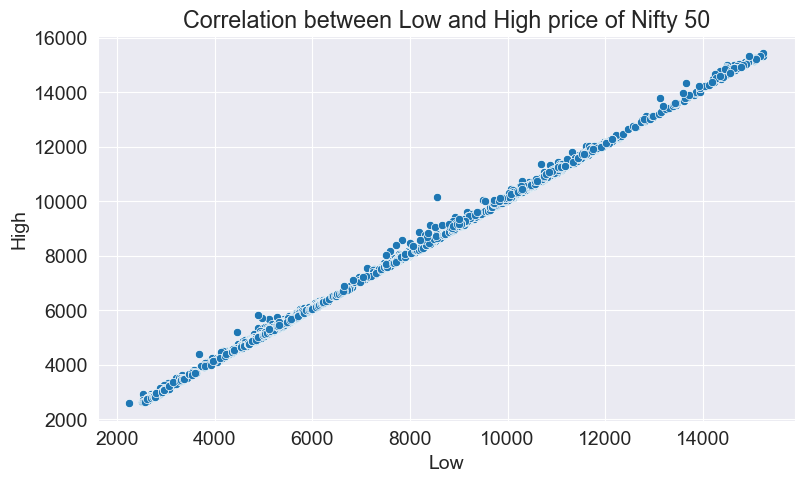

In [153]:
plt.title("Correlation between Low and High price of Nifty 50")
sns.scatterplot(x=stock_df['Low'], y=stock_df['High'])

This graph shows the high price of Nifty against its low price. Mostly they were in similar ranges with each other. there are some anomilies in this trend

Let us save and upload our work to Jovian before continuing

In [218]:
import jovian

In [219]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jiyakirori/nifty50-through-years-2007-2021" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/jiyakirori/nifty50-through-years-2007-2021


'https://jovian.ai/jiyakirori/nifty50-through-years-2007-2021'

## Asking and Answering Questions
I am going to make some more inferences about the data by asking few questions about the dataset

#### What is the maximum high of Nifty and in which year?

In [155]:
High_prices_per_year.max()

15431.75

So nifty 50 made a high of 15431 rs in 2021

#### What is the minimum low of Nifty and in which year?

In [220]:
low_prices_per_year.min()

year    2007.00
Low     2252.75
dtype: float64

So nifty 50 made a low of 2252 rs in 2007

#### How did the pandemic affect the prices of Nifty50

In [221]:
High_prices_per_year.iloc[13]

year     2020.000000
High    14024.849609
Name: 13, dtype: float64

In [222]:
low_prices_per_year.iloc[13]

year    2020.000000
Low     7511.100098
Name: 13, dtype: float64

Nifty made a high of 14024 in 2020 and a low of 7511. We can even try to find the months this happened

In [227]:
stock_df['month'] = pd.DatetimeIndex(stock_df.Date).month
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,year,month
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0,2007,9
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0,2007,9
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0,2007,9
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0,2007,9
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0,2007,9
...,...,...,...,...,...,...,...,...,...
3348,2021-04-12,14644.650391,14652.500000,14248.700195,14310.799805,14310.799805,650200.0,2021,4
3349,2021-04-13,14364.900391,14528.900391,14274.900391,14504.799805,14504.799805,605100.0,2021,4
3350,2021-04-15,14522.400391,14597.549805,14353.200195,14581.450195,14581.450195,568000.0,2021,4
3351,2021-04-16,14599.599609,14697.700195,14559.000000,14617.849609,14617.849609,577200.0,2021,4


In [228]:
Nifty_2020= stock_df[stock_df['year']==2020]
month_wise_high = Nifty_2020.groupby('month').max()['High']
month_wise_high=month_wise_high.reset_index()
month_wise_high

,month,High
0,1,12430.500000
1,2,12246.700195
2,3,11433.000000
3,4,9889.049805
4,5,9598.849609
5,6,10553.150391
6,7,11341.400391
7,8,11794.250000
8,9,11618.099609
9,10,12025.450195


In [229]:
month_wise_low = Nifty_2020.groupby('month').min()['Low']
month_wise_low=month_wise_low.reset_index()
month_wise_low

,month,Low
0,1,11929.599609
1,2,11175.049805
2,3,7511.100098
3,4,8055.799805
4,5,8806.750000
5,6,9544.349609
6,7,10299.599609
7,8,10882.250000
8,9,10790.200195
9,10,11347.049805


So nifty50 made the high in december 2020 and the low in march 2020. the reason for the low would have been the outbreak of COVID-19 in march and by the end of the year the market srarted stabilization thus making the high

#### What was the condition of NIFTY 50 in 2020?

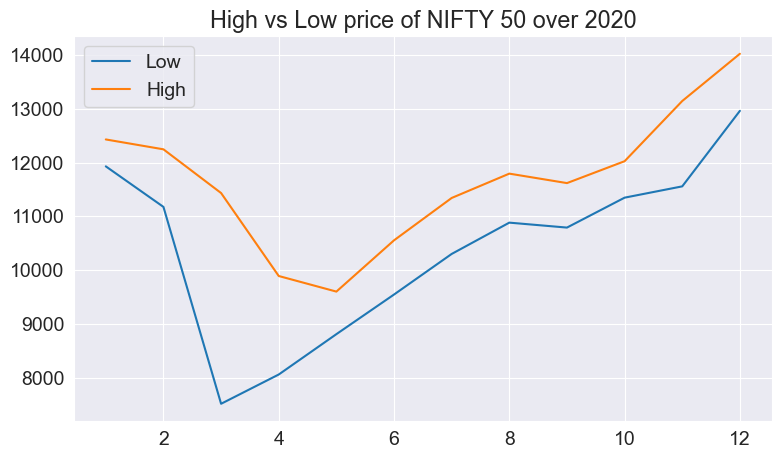

In [230]:
plt.title("High vs Low price of NIFTY 50 over 2020")
plt.plot(month_wise_low['month'], month_wise_low['Low'])
plt.plot(month_wise_high['month'], month_wise_high['High'])
plt.legend(["Low", "High"])

#### What was the volume distribution in 2020?

In [231]:
month_wise_vol = Nifty_2020.groupby('month').min()['Volume']
month_wise_vol=month_wise_vol.reset_index()
month_wise_vol

,month,Volume
0,1,400.0
1,2,0.0
2,3,593300.0
3,4,506300.0
4,5,575900.0
5,6,556200.0
6,7,525200.0
7,8,452600.0
8,9,0.0
9,10,447700.0


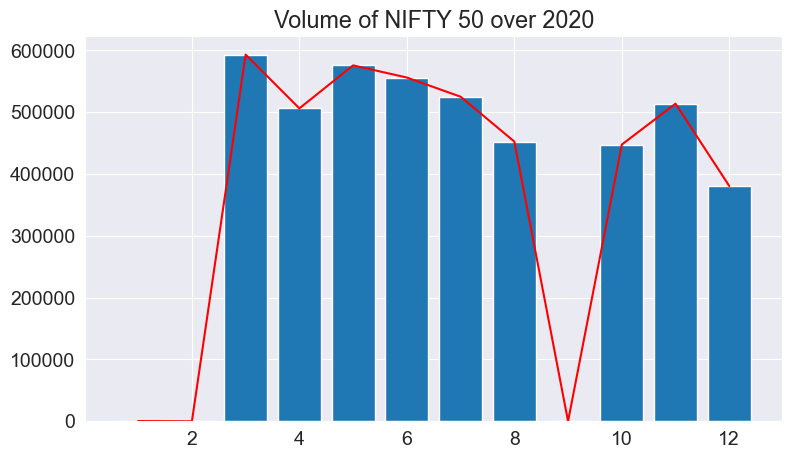

In [232]:
plt.title("Volume of NIFTY 50 over 2020")
plt.bar(month_wise_vol['month'], month_wise_vol['Volume'])
plt.plot(month_wise_vol['month'], month_wise_vol['Volume'],'r')

Let us save and upload our work to Jovian before continuing.

In [233]:
import jovian

In [234]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jiyakirori/nifty50-through-years-2007-2021" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/jiyakirori/nifty50-through-years-2007-2021


'https://jovian.ai/jiyakirori/nifty50-through-years-2007-2021'

## Inferences and Conclusion
So, Nifty50 has grown significantly throught the years. there was a giant leap in the high prices of nifty in the years 2016 to 2018.there was a big fall in prices in 2008 and 2020. the 2008 fall would be because of the market collapse in 2008 and COVID-19 in 2020.the volume of nifty started increasing in 2012 and grew exponencially in 2019 to 2021. there is a lot of volume in 2020 so many people traded because of the fall in prices of the stocks. nifty 50 made a high of 15431 rs in 2021.nifty 50 made a low of 2252 rs in 2007.Nifty made a high of 14024 in december 2020 and a low of 7511 in march 2020. there was a high in the volume of nifty in march 2020 because of this low.

In [235]:
import jovian

In [236]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jiyakirori/nifty50-through-years-2007-2021" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/jiyakirori/nifty50-through-years-2007-2021


'https://jovian.ai/jiyakirori/nifty50-through-years-2007-2021'

## References and Future Work
this data can be used to make a ML model for predicting the price of Nifty50. few resources i found useful were -
* Part 9 of "Data Analysis with Python: Zero to Pandas"
* https://datagy.io/pandas-fillna/
* pandas documentation
* matplotlib documentation
* seaborn documentation
* https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/

In [237]:
import jovian

In [238]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jiyakirori/nifty50-through-years-2007-2021" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/jiyakirori/nifty50-through-years-2007-2021


'https://jovian.ai/jiyakirori/nifty50-through-years-2007-2021'